## NPI Study
## Analysis built by Blake Hamm
## 23 January 2022

<br>
This jupyter notebook focuses on exploratory data analysis (EDA) and vizualizations. It will aim at establishing any obvious patterns in the data for further testing and analysis.

In [49]:
## Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display



## Set figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})



## Load data
sheets_dict = pd.read_excel(
    'data/clean_data.ods', sheet_name=None, engine='odf')

# Make tables for each sheet
for name, df in sheets_dict.items():
    exec(name + " = df")
    print('\n\n', '=== ', name, ' ===')
    display(df.head(3))



 ===  patient  ===


,id,sex,dob,group
0,118,Male,1996-09-16,Rehab
1,115,Female,1965-08-14,Combination
2,112,Female,1967-08-15,STM




 ===  vas  ===


,id,resting,active,observation,observation_dummy
0,112,4.0,6.5,pre,0
1,112,1.0,2.0,post,1
2,115,1.5,8.0,pre,0




 ===  balance  ===


,id,standard,proprioception,vision,vestibular,front_left,front_right,back_left,back_right,observation,observation_dummy
0,112,14,24,32,78,135,160,67,37,pre,0
1,112,15,38,34,86,128,132,37,37,post,1
2,115,21,18,26,69,120,98,34,30,pre,0




 ===  strength  ===


,id,type,trial_1,trial_2,observation,observation_dummy
0,112,Quad Extension,36.4,34.6,pre,0
1,112,Hamstring Flexion,30.1,30.2,pre,0
2,112,Quad Extension,17.4,17.3,post,1




 ===  rangeofmotion  ===


,id,type,trial_1,trial_2,observation,observation_dummy
0,112,Active Hip Internal,40.5,40.3,pre,0
1,112,Passive Hip Internal,30.7,36.4,pre,0
2,112,Active Hip External,37.8,42.8,pre,0


In [56]:
## Function to build EDA
def run_eda(df, cols):
    fig, axs = plt.subplots(ncols=len(cols))
    for i, col_name in enumerate(cols):
        sns.boxplot(x='observation', y=col_name, data=df, ax=axs[i])

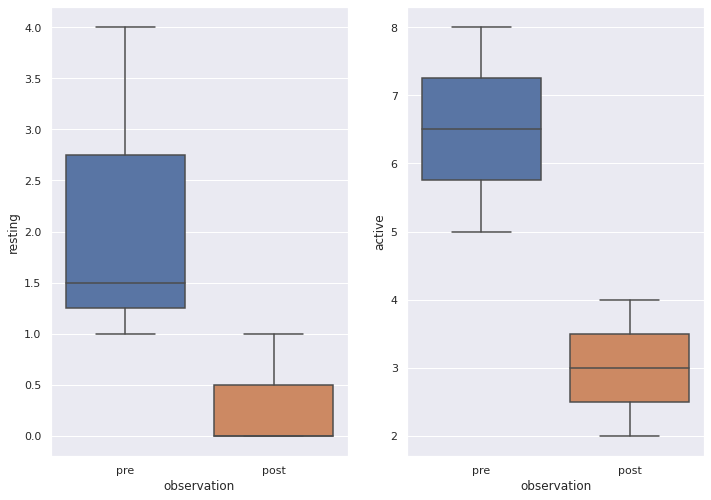

In [57]:
## Explore 'vas' data
vas_cols = ['resting','active']
run_eda(vas, vas_cols)

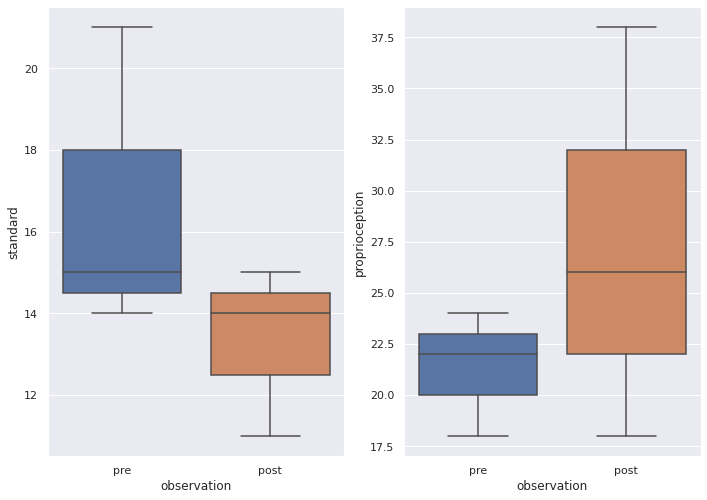

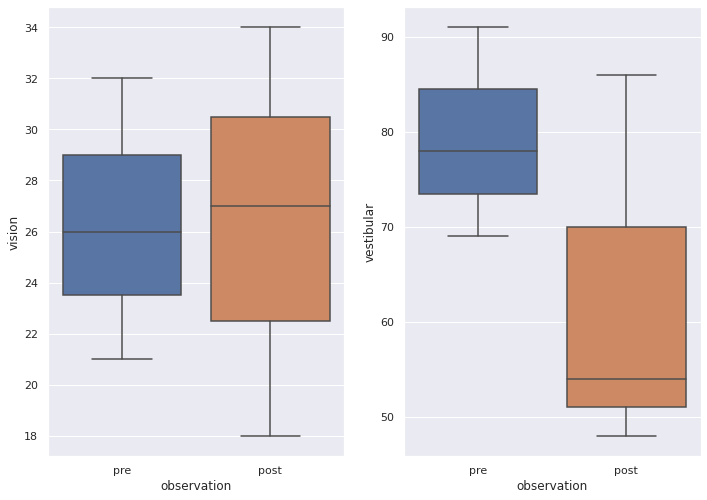

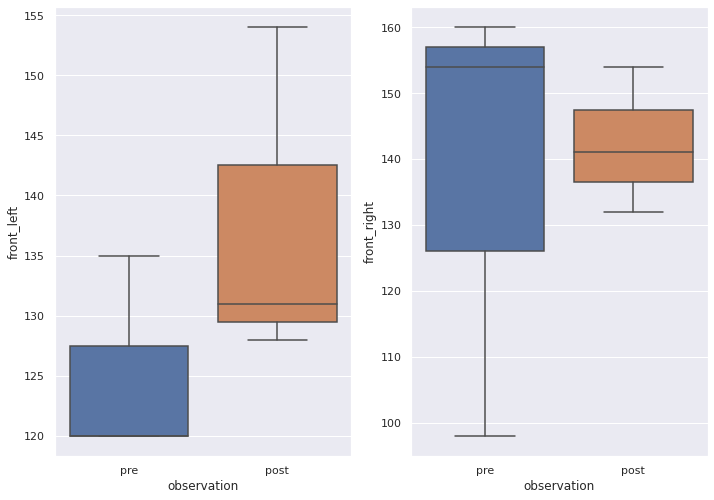

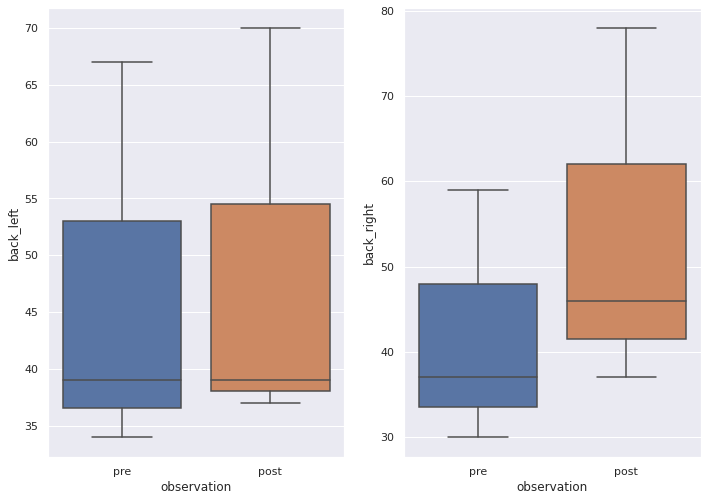

In [83]:
## Explore 'balance' data
balance_cols_a = ['standard','proprioception']
run_eda(balance, balance_cols_a)

balance_cols_b = ['vision','vestibular']
run_eda(balance, balance_cols_b)

balance_cols_c = ['front_left','front_right']
run_eda(balance, balance_cols_c)

balance_cols_d = ['back_left','back_right']
run_eda(balance, balance_cols_d)

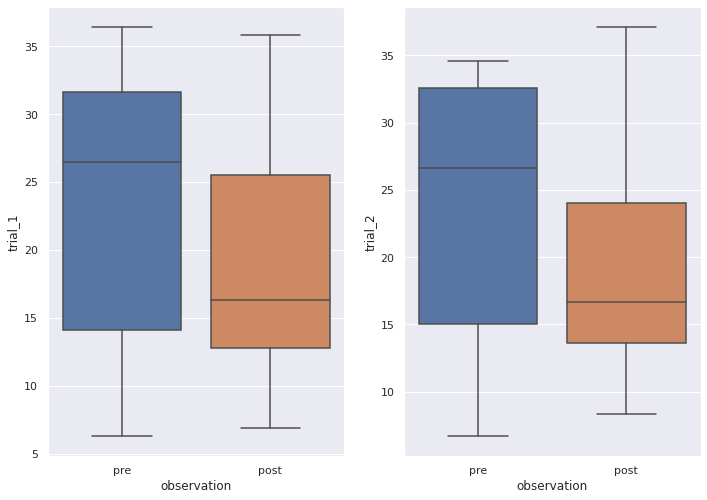

In [61]:
## Explore 'strength' data
strength_cols = ['trial_1', 'trial_2']
run_eda(strength, strength_cols)

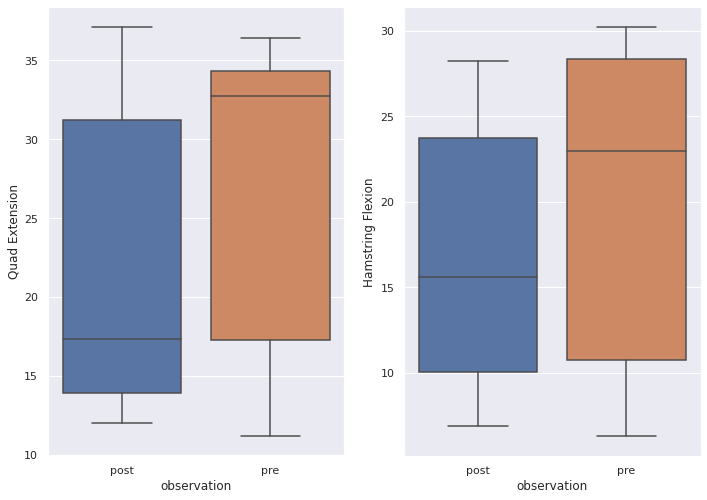

In [76]:
## Explore 'strength' data

# Clean data (trial columns)
strength_clean = strength.melt(
    id_vars=['id', 'type','observation','observation_dummy'], 
    var_name='trial', 
    value_name='vals')

# Get type
types = list(strength_clean.type.unique())
strength_clean = strength_clean.pivot(
    index=['id','trial','observation','observation_dummy'],
    columns='type', values='vals').reset_index()

# Build visualz
run_eda(strength_clean, types)

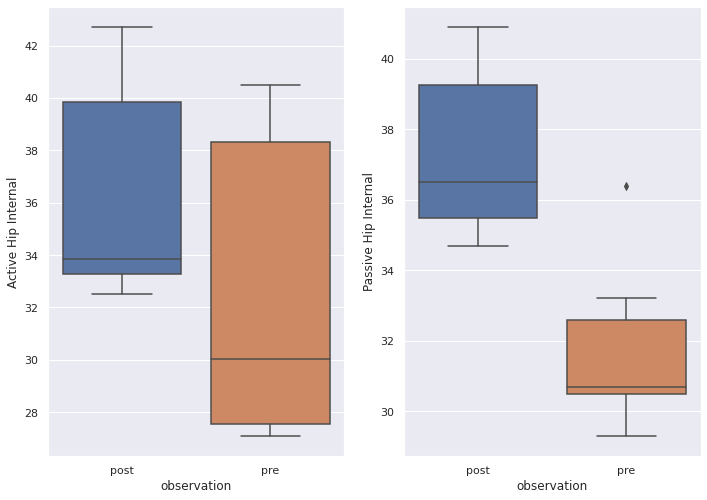

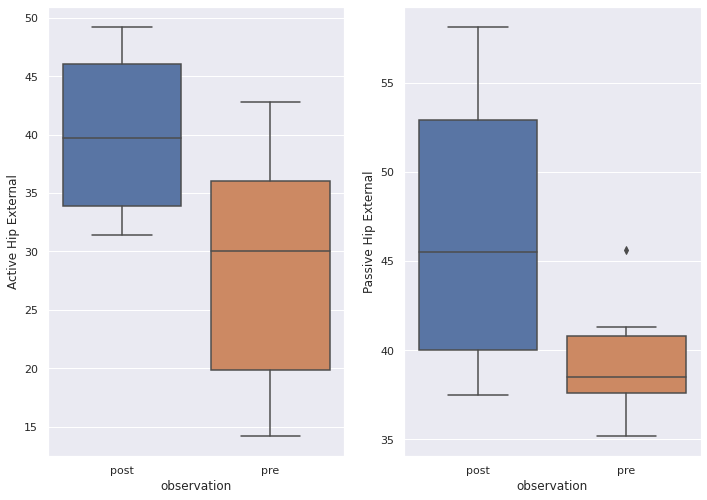

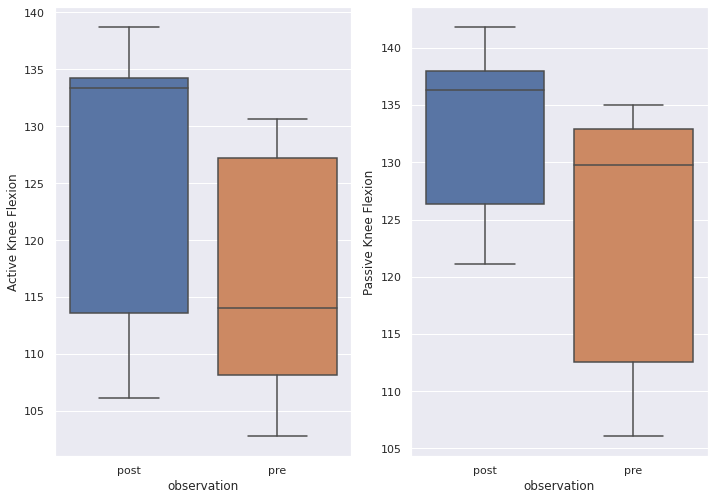

In [82]:
## Explore 'rangeofmotion' data

# Clean data (trial columns)
rangeofmotion_clean = rangeofmotion.melt(
    id_vars=['id', 'type','observation','observation_dummy'], 
    var_name='trial', 
    value_name='vals')

# Get type
types = list(rangeofmotion_clean.type.unique())
rangeofmotion_clean = rangeofmotion_clean.pivot(
    index=['id','trial','observation','observation_dummy'],
    columns='type', values='vals').reset_index()

# Build visualz
run_eda(rangeofmotion_clean, types[:2])
run_eda(rangeofmotion_clean, types[2:4])
run_eda(rangeofmotion_clean, types[4:])